In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
bkf_train = pd.read_csv("train.csv")

In [4]:
bkf_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
bkf_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [6]:
bkf_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
bkf_train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [8]:
bkf_train['Product_ID'].describe()

count        550068
unique         3631
top       P00265242
freq           1880
Name: Product_ID, dtype: object

In [9]:
bkf_train['Product_ID'].unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00370293',
       'P00371644', 'P00370853'], dtype=object)

In [10]:
bkf_train['Gender'].describe()

count     550068
unique         2
top            M
freq      414259
Name: Gender, dtype: object

In [11]:
bkf_train['Age'].describe()

count     550068
unique         7
top        26-35
freq      219587
Name: Age, dtype: object

In [12]:
bkf_train['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [13]:
bkf_train['City_Category'].describe()

count     550068
unique         3
top            B
freq      231173
Name: City_Category, dtype: object

In [14]:
bkf_train['Stay_In_Current_City_Years'].describe()

count     550068
unique         5
top            1
freq      193821
Name: Stay_In_Current_City_Years, dtype: object

In [15]:
bkf_train['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [16]:
bkf_train.shape

(550068, 12)

In [17]:
print(bkf_train['Product_Category_1'].value_counts(dropna =False))

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64


In [18]:
print(bkf_train['Product_Category_2'].value_counts(dropna =False))

NaN     173638
8.0      64088
14.0     55108
2.0      49217
16.0     43255
15.0     37855
5.0      26235
4.0      25677
6.0      16466
11.0     14134
17.0     13320
13.0     10531
9.0       5693
12.0      5528
10.0      3043
3.0       2884
18.0      2770
7.0        626
Name: Product_Category_2, dtype: int64


In [19]:
print(bkf_train['Product_Category_3'].value_counts(dropna =False))

NaN     383247
16.0     32636
15.0     28013
14.0     18428
17.0     16702
5.0      16658
8.0      12562
9.0      11579
12.0      9246
13.0      5459
6.0       4890
18.0      4629
4.0       1875
11.0      1805
10.0      1726
3.0        613
Name: Product_Category_3, dtype: int64


In [20]:
bkf_train["Product_Category_3"].fillna('empty',inplace = True)

In [21]:
bkf_train["Product_Category_2"].fillna('empty',inplace = True)

In [22]:
bkf_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,empty,empty,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,empty,empty,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,empty,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,empty,empty,7969


In [29]:
bkf_train.groupby('Age').Purchase.agg([min, max])

,min,max
Age,,
0-17,12,23955
18-25,12,23958
26-35,12,23961
36-45,12,23960
46-50,12,23960
51-55,12,23960
55+,12,23960


In [34]:
bkf_train.groupby('City_Category').Purchase.agg([len,min, max])

,len,min,max
City_Category,,,
A,147720,12,23961
B,231173,12,23960
C,171175,12,23961


In [32]:
bkf_train['Gender'].value_counts(dropna =False)

M    414259
F    135809
Name: Gender, dtype: int64

In [33]:
bkf_train['Age'].value_counts(dropna =False)

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [37]:
bkf_train['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [38]:
bkf_train.groupby('Gender', as_index=False).Purchase.mean()

,Gender,Purchase
0,F,8734.565765
1,M,9437.526040


In [39]:
bkf_train.groupby('Age', as_index=False).Purchase.mean()

,Age,Purchase
0,0-17,8933.464640
1,18-25,9169.663606
2,26-35,9252.690633
3,36-45,9331.350695
4,46-50,9208.625697
5,51-55,9534.808031
6,55+,9336.280459


In [40]:
bkf_train.groupby('Product_ID', as_index=False).Purchase.mean()

,Product_ID,Purchase
0,P00000142,11143.642361
1,P00000242,10551.851064
2,P00000342,5313.422131
3,P00000442,4795.358696
4,P00000542,5417.530201
...,...,...
3626,P0099442,14351.915000
3627,P0099642,6439.230769
3628,P0099742,7872.603175
3629,P0099842,7228.549020


In [43]:
bkf_train.groupby('User_ID', as_index=False).Purchase.mean()

,User_ID,Purchase
0,1000001,9545.514286
1,1000002,10525.610390
2,1000003,11780.517241
3,1000004,14747.714286
4,1000005,7745.292453
...,...,...
5886,1006036,8007.894942
5887,1006037,9176.540984
5888,1006038,7502.833333
5889,1006039,7977.283784


In [46]:
bkf_train.groupby('User_ID', as_index=False).Purchase.median()

,User_ID,Purchase
0,1000001,9946.0
1,1000002,9899.0
2,1000003,12103.0
3,1000004,15852.5
4,1000005,6168.0
...,...,...
5886,1006036,7483.0
5887,1006037,8063.5
5888,1006038,6895.5
5889,1006039,7153.0


Text(0, 0.5, 'Average Purcahse')

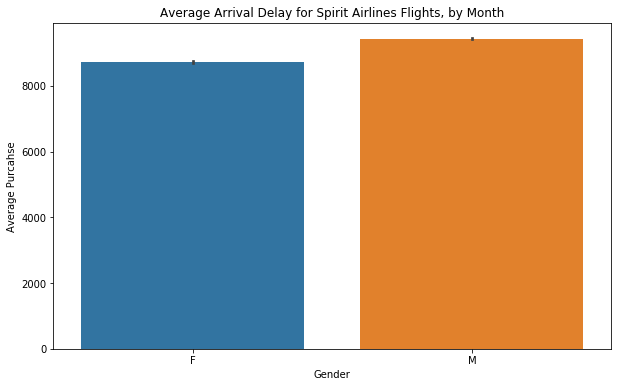

In [48]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Count of Purchase")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=bkf_train.Gender, y=bkf_train['Purchase'])

# Add label for vertical axis
plt.ylabel("Count of Purcahse")

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(14,7))

# Add title
plt.title("Average Arrival Delay for Each Airline, by Month")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=bkf_train, annot=True)

# Add label for horizontal axis
plt.xlabel("Airline")

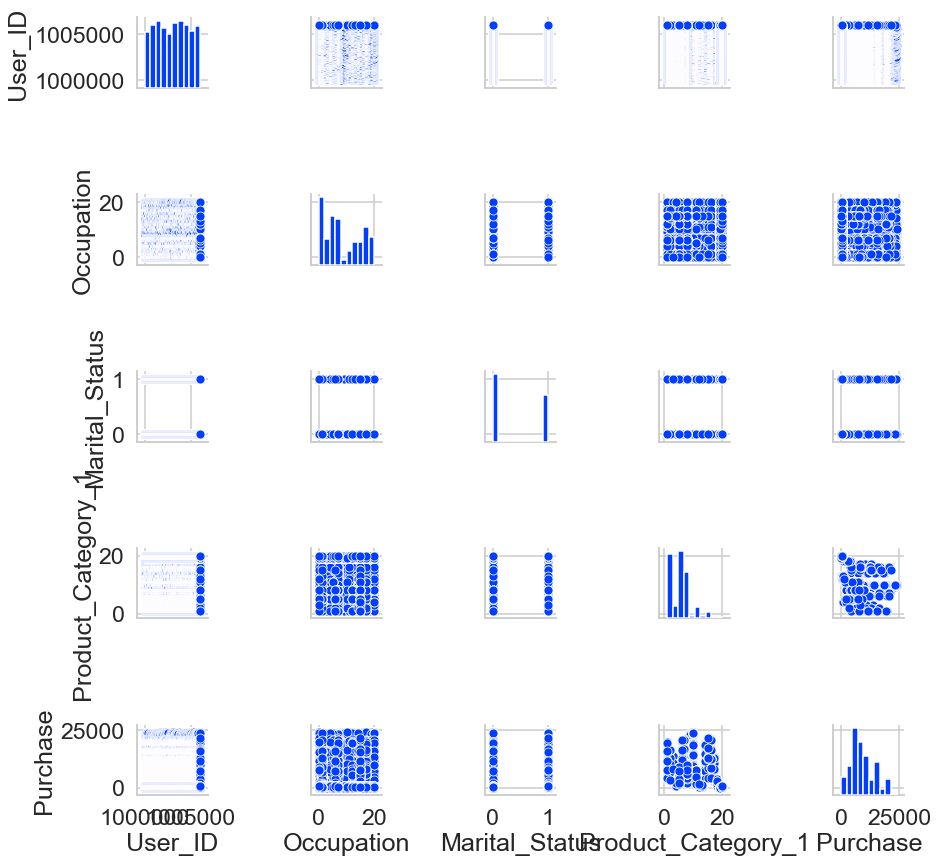

In [85]:
sns.pairplot(bkf_train);

In [71]:
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

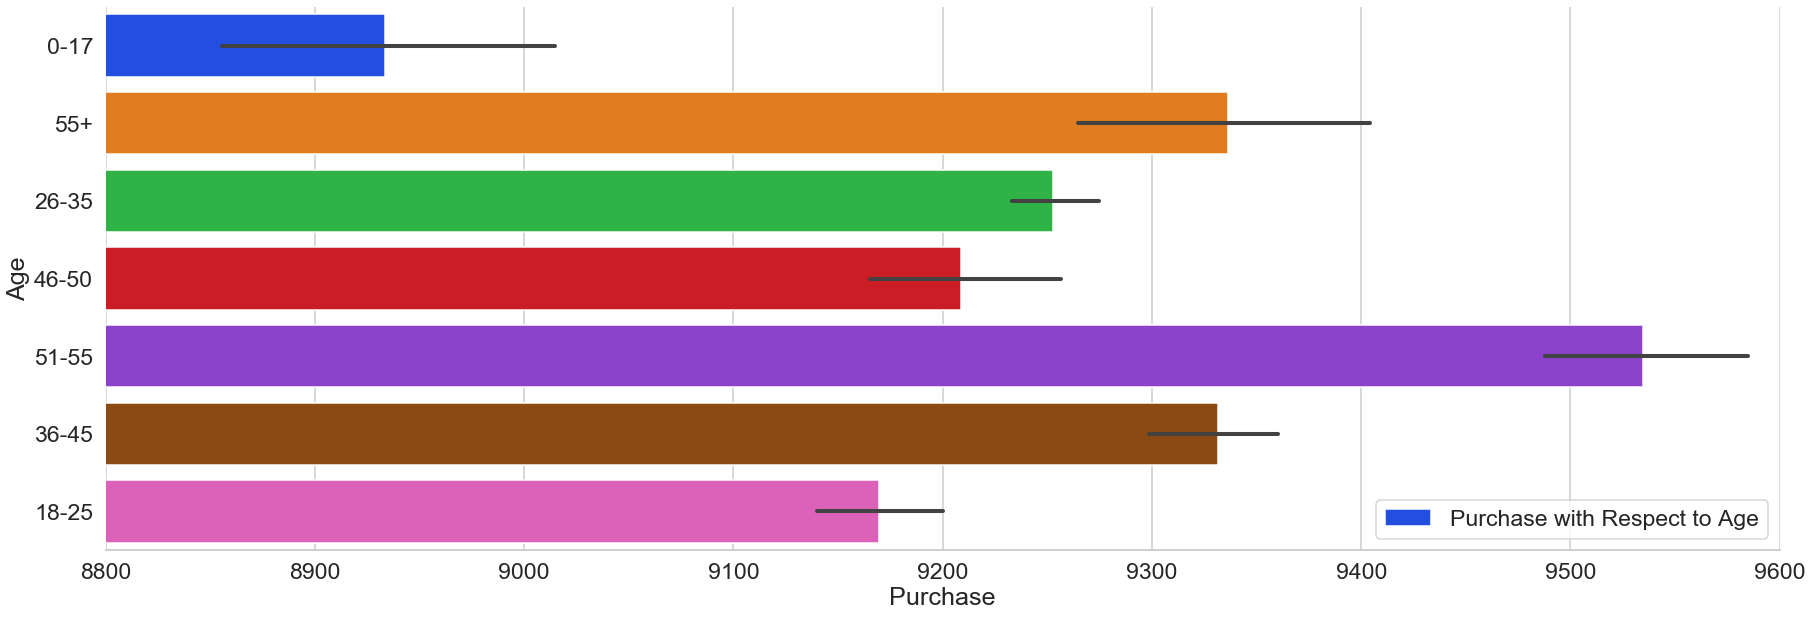

In [82]:
sns.set(style="whitegrid")

sns.axes_style()
sns.set_palette("bright")
sns.set_context("talk", font_scale=1.4)

f, ax = plt.subplots(figsize=(30, 10))
sns.barplot(x="Purchase", y="Age", data=bkf_train,
            label="Purchase with Respect to Age")
ax.legend(ncol=5, loc="lower right", frameon=True)
ax.set(xlim=(8800, 9600), ylabel="Age",
       xlabel="Purchase")
sns.despine(left=True, top=True)

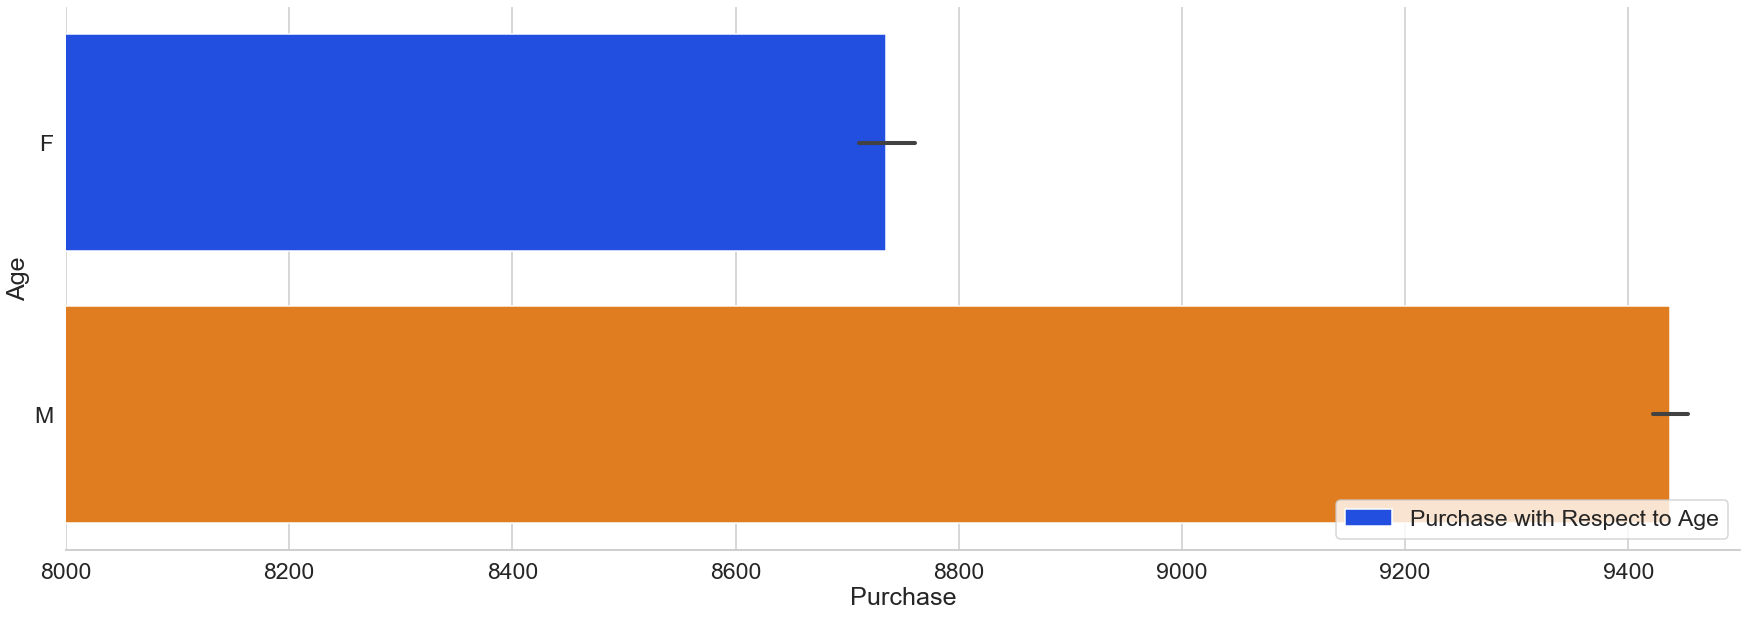

In [84]:
sns.set(style="whitegrid")
sns.axes_style()
sns.set_palette("bright")
sns.set_context("talk", font_scale=1.4)
f, ax = plt.subplots(figsize=(30, 10))
sns.barplot(x="Purchase", y="Gender", data=bkf_train,
            label="Purchase with Respect to Age")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(8000, 9500), ylabel="Age",
       xlabel="Purchase")
sns.despine(left=True, top=True)